## IMPORTING REQUIRED LIBRARIES

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 300)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## READING THE DATA 

In [2]:
# Load the data file into a dataframe
telecom = pd.read_csv('telecom_churn_data.csv')

In [3]:
# Copy the data into another dataframe
tdf = telecom.copy()

In [4]:
tdf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# View the details of all columns in dataframe
tdf.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
# Shape of dataframe
tdf.shape

(99999, 226)

## DATA PREPARATION

### WEEDING OUT REDUNDANCIES

In [7]:
# View the count of unique records in circle id
tdf['circle_id'].value_counts()

109    99999
Name: circle_id, dtype: int64

In [8]:
# Drop circle_id as all records have only one value 109
tdf.drop(['circle_id'],axis=1,inplace=True)

In [9]:
# Columns with only on uniqe value
for c in tdf.columns:
    if len(tdf[c].value_counts()) == 1:
        print(tdf[c].value_counts())
        
# loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8
# std_og_t2c_mou_9, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8 & std_ic_t2o_mou_9
# have only one value in all records i.e 0. Hence drop these columns

# last_date_of_month_6 tells the last day for the month of July
# last_date_of_month_7 tells the last day for the month of August
# last_date_of_month_8 tells the last day for the month of September
# last_date_of_month_9 tells the last day for the month of October
# Deleting the above columns as well

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
8/31/2014    98899
Name: last_date_of_month_8, dtype: int64
9/30/2014    98340
Name: last_date_of_month_9, dtype: int64
0.0    96062
Name: std_og_t2c_mou_6, dtype: int64
0.0    96140
Name: std_og_t2c_mou_7, dtype: int64
0.0    94621
Name: std_og_t2c_mou_8, dtype: int64
0.0    92254
Name: std_og_t2c_mou_9, dtype: int64
0.0    96062
Name: std_ic_t2o_mou_6, dtype: int64
0.0    96140
Name: std_ic_t2o_mou_7, dtype: int64
0.0    94621
Name: std_ic_t2o_mou_8, dtype: int64
0.0    92254
Name: std_ic_t2o_mou_9, dtype: int64


In [10]:
# loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8
# std_og_t2c_mou_9, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8 & std_ic_t2o_mou_9
# have only one value in all records i.e 0. Hence drop these columns
tdf.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
         'std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9',
         'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],axis=1,inplace=True)

In [11]:
#List all columns with word date in it
dt = tdf.columns[tdf.columns.str.contains('date')]
dt

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [12]:
# Drop these date columns as we have AON column (Age on network - number of days the customer is using the operator T network)
tdf.drop(dt,axis=1,inplace=True)

In [13]:
# Check the data types of all columns
tdf.dtypes

# Confirmed all the columns are of numeric data type

mobile_number           int64
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2m_mou_9      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2f_mou_9      float64
loc_og_t2c

In [14]:
tdf.shape

(99999, 202)

### FILTERING HIGH VALUE CUSTOMERS

In [15]:
# The case study documentation considers a customer life cycle to comprise of three phases: Good Phase, Action Phase
# and Churn Phase

# For this case study, the 6th and 7th month are part of Good Phase. 
# 8th month is Action Phase & 9th month is Churn Phase

# Objective of the Case Study is to predict Churn Rate for High Value Customers.
# Churn is defined using the Usage-based approach
# Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. 
# over a period of time.

# As per the requirement of the case study, we have to limit the data sample to customers who contribute more towards
# company's revenue by doing higher recharge (High Value Customers). 

# Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, 
# where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

# Hence compute the average of 6th and 7th month(good phase) of total recharge for each user. 
# Then consider only the customers with recharge amt > 70th percentile of this average value

# As 6th and 7th months are part of good phase, combining the data for these two months in one variable called average.
# Thus reducing the number of variables. And then later drop all the original variables for 6th and 7th month.

col_6 = list(tdf.columns[tdf.columns.str.contains("_6")])
print(col_6)
col_7 = list(tdf.columns[tdf.columns.str.contains("_7")])
print(col_7)

print(len(col_7))

i=0
new_df_6 = tdf[col_6]
new_df_7 = tdf[col_7]
new_df_n=pd.DataFrame
while i < len(col_6):
    new_col='avg_'+col_6[i]+"_7"
    tdf[new_col]=(new_df_6.iloc[:,i]+new_df_7.iloc[:,i])/2
    i=i+1
    

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'fb_user_6']
['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'lo

In [16]:
tdf.shape

(99999, 251)

In [17]:
# View the new columns
tdf.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'avg_vol_2g_mb_6_7', 'avg_vol_3g_mb_6_7', 'avg_arpu_3g_6_7',
       'avg_arpu_2g_6_7', 'avg_night_pck_user_6_7', 'avg_monthly_2g_6_7',
       'avg_sachet_2g_6_7', 'avg_monthly_3g_6_7', 'avg_sachet_3g_6_7',
       'avg_fb_user_6_7'],
      dtype='object', length=251)

In [18]:
# Drop the original 49*2 columns.
tdf.drop(col_6,axis=1,inplace=True)
tdf.drop(col_7,axis=1,inplace=True)
tdf.shape

(99999, 153)

In [19]:
# Compute Percentile on average recharge amount
tdf['avg_total_rech_amt_6_7'].describe(percentiles=[0.2,0.5,0.7,0.9])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
20%         99.500000
50%        229.000000
70%        368.500000
90%        698.000000
max      37762.500000
Name: avg_total_rech_amt_6_7, dtype: float64

In [20]:
# The 70th percentile value is 368
# Make a new dataframe with customer having total recharge amt > 368
tdf_cust = tdf[tdf['avg_total_rech_amt_6_7']>368].copy()

In [21]:
tdf_cust.shape

(30011, 153)

### TREATING MISSING VALUES

In [22]:
# columns with name total
tdf_cust.columns[tdf_cust.columns.str.contains('total')]

# We have columns with Total Outgoing MOU, Total Incoming MOU, Total Recharge Num(times)
# and Total Recharge Amount for all months
# There is no column called Total Recharge amount only for data

Index(['total_og_mou_8', 'total_og_mou_9', 'total_ic_mou_8', 'total_ic_mou_9',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_8',
       'total_rech_amt_9', 'total_rech_data_8', 'total_rech_data_9',
       'avg_total_og_mou_6_7', 'avg_total_ic_mou_6_7',
       'avg_total_rech_num_6_7', 'avg_total_rech_amt_6_7',
       'avg_total_rech_data_6_7'],
      dtype='object')

In [23]:
# columns with name av (average)
tdf_cust.columns[tdf_cust.columns.str.contains('av_')]

# We can see we have columns called average recharge amount for data by all months.
# We dont have a average recharge amount for call (non data)

Index(['av_rech_amt_data_8', 'av_rech_amt_data_9', 'avg_av_rech_amt_data_6_7'], dtype='object')

In [24]:
# columns with name max 
tdf_cust.columns[tdf_cust.columns.str.contains('max')]

# Not sure if we will use these max columns. Will see the siginificance of these columns later in the process

Index(['max_rech_amt_8', 'max_rech_amt_9', 'max_rech_data_8',
       'max_rech_data_9', 'avg_max_rech_amt_6_7', 'avg_max_rech_data_6_7'],
      dtype='object')

In [25]:
# Checking percentage of missing values with columns more than 60% null values
cols=round(100*(tdf_cust.isnull().sum()/len(tdf_cust.index)), 2)[round(100*(tdf_cust.isnull().sum()/len(tdf_cust.index)), 2) > 60]
cols
# More than 60% of the customers dont recharge for mobile internet 
# or use any mobile internet / data.

# Since all these columns are related to mobile internet, hence NA value is equivalent to 0 [customer is not using internet services].# 
# Therefore imputing the below columns with value 0.

total_rech_data_8           60.83
total_rech_data_9           61.81
max_rech_data_8             60.83
max_rech_data_9             61.81
count_rech_2g_8             60.83
count_rech_2g_9             61.81
count_rech_3g_8             60.83
count_rech_3g_9             61.81
av_rech_amt_data_8          60.83
av_rech_amt_data_9          61.81
arpu_3g_8                   60.83
arpu_3g_9                   61.81
arpu_2g_8                   60.83
arpu_2g_9                   61.81
night_pck_user_8            60.83
night_pck_user_9            61.81
fb_user_8                   60.83
fb_user_9                   61.81
avg_total_rech_data_6_7     69.27
avg_max_rech_data_6_7       69.27
avg_count_rech_2g_6_7       69.27
avg_count_rech_3g_6_7       69.27
avg_av_rech_amt_data_6_7    69.27
avg_arpu_3g_6_7             69.27
avg_arpu_2g_6_7             69.27
avg_night_pck_user_6_7      69.27
avg_fb_user_6_7             69.27
dtype: float64

In [26]:
# Fill the NA values with zero as Null values for these columns
# means the user is not using any mobile internet.
tdf_cust[cols.index]=tdf_cust[cols.index].fillna(0)

In [27]:
# Columns with NA values
round(100*(tdf_cust.isnull().sum()/len(tdf_cust.index)), 2)[round(100*(tdf_cust.isnull().sum()/len(tdf_cust.index)), 2) != 0]

onnet_mou_8               3.13
onnet_mou_9               5.68
offnet_mou_8              3.13
offnet_mou_9              5.68
roam_ic_mou_8             3.13
roam_ic_mou_9             5.68
roam_og_mou_8             3.13
roam_og_mou_9             5.68
loc_og_t2t_mou_8          3.13
loc_og_t2t_mou_9          5.68
loc_og_t2m_mou_8          3.13
loc_og_t2m_mou_9          5.68
loc_og_t2f_mou_8          3.13
loc_og_t2f_mou_9          5.68
loc_og_t2c_mou_8          3.13
loc_og_t2c_mou_9          5.68
loc_og_mou_8              3.13
loc_og_mou_9              5.68
std_og_t2t_mou_8          3.13
std_og_t2t_mou_9          5.68
std_og_t2m_mou_8          3.13
std_og_t2m_mou_9          5.68
std_og_t2f_mou_8          3.13
std_og_t2f_mou_9          5.68
std_og_mou_8              3.13
std_og_mou_9              5.68
isd_og_mou_8              3.13
isd_og_mou_9              5.68
spl_og_mou_8              3.13
spl_og_mou_9              5.68
og_others_8               3.13
og_others_9               5.68
loc_ic_t

In [28]:
# Since all these columns with NA values are numeric columns hence imputing NA values with value 0.
tdf_cust.fillna(0,inplace=True)

### TAGGING CHURNERS

In [29]:
# Now create a column called Churn with value 1 if customer did churn and value 0 if customer didnt churn 
# based on 9th month data.

# Basis for tagging customers as Churned:
    # Those who have not made any calls (either incoming or outgoing) AND
    # have not used mobile internet even once in the churn phase. 
    # The attributes we use to tag churners are: total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, and vol_3g_mb_9


# List all the columns with string _9
tdf_cust.columns[tdf_cust.columns.str.contains('_9')]


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9'],
      dtype='object')

In [29]:
tdf_cust['Churn'] = np.where(((tdf_cust['total_ic_mou_9']==0.0) & (tdf_cust['total_og_mou_9']==0.0) & (tdf_cust['vol_2g_mb_9']==0.0)
                            & (tdf_cust['vol_3g_mb_9']==0.0)),1,0)

In [30]:
tdf_cust.head()

,mobile_number,arpu_8,arpu_9,onnet_mou_8,onnet_mou_9,offnet_mou_8,offnet_mou_9,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_8,std_og_mou_9,isd_og_mou_8,isd_og_mou_9,spl_og_mou_8,spl_og_mou_9,og_others_8,og_others_9,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_8,std_ic_mou_9,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_8,isd_ic_mou_9,ic_others_8,ic_others_9,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_8,total_rech_data_9,max_rech_data_8,max_rech_data_9,count_rech_2g_8,count_rech_2g_9,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_8,arpu_3g_9,arpu_2g_8,arpu_2g_9,night_pck_user_8,night_pck_user_9,monthly_2g_8,monthly_2g_9,sachet_2g_8,sachet_2g_9,monthly_3g_8,monthly_3g_9,sachet_3g_8,sachet_3g_9,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_arpu_6_7,avg_onnet_mou_6_7,avg_offnet_mou_6_7,avg_roam_ic_mou_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2t_mou_6_7,avg_loc_og_t2m_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_loc_og_t2c_mou_6_7,avg_loc_og_mou_6_7,avg_std_og_t2t_mou_6_7,avg_std_og_t2m_mou_6_7,avg_std_og_t2f_mou_6_7,avg_std_og_mou_6_7,avg_isd_og_mou_6_7,avg_spl_og_mou_6_7,avg_og_others_6_7,avg_total_og_mou_6_7,avg_loc_ic_t2t_mou_6_7,avg_loc_ic_t2m_mou_6_7,avg_loc_ic_t2f_mou_6_7,avg_loc_ic_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_std_ic_t2m_mou_6_7,avg_std_ic_t2f_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_isd_ic_mou_6_7,avg_ic_others_6_7,avg_total_rech_num_6_7,avg_total_rech_amt_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_total_rech_data_6_7,avg_max_rech_data_6_7,avg_count_rech_2g_6_7,avg_count_rech_3g_6_7,avg_av_rech_amt_data_6_7,avg_vol_2g_mb_6_7,avg_vol_3g_mb_6_7,avg_arpu_3g_6_7,avg_arpu_2g_6_7,avg_night_pck_user_6_7,avg_monthly_2g_6_7,avg_sachet_2g_6_7,avg_monthly_3g_6_7,avg_sachet_3g_6_7,avg_fb_user_6_7,Churn
7,7000701601,3171.480,500.000,52.29,0.00,325.91,0.00,31.64,0.00,38.06,0.00,40.28,0.00,162.28,0.00,53.23,0.00,0.00,0.0,255.79,0.00,12.01,0.00,49.14,0.00,16.68,0.00,77.84,0.00,10.01,0.0,6.50,0.00,0.0,0.0,350.16,0.00,27.31,0.00,121.19,0.00,39.53,0.00,188.04,0.00,30.39,0.00,141.33,0.00,22.21,0.0,193.94,0.00,428.74,0.00,0.0,0.0,31.59,0.00,15.14,0.00,7,3,3638,0,1580,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,802,57.74,19.38,18.74,0.0,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.09,2.25,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,7001524846,137.362,166.787,35.08,33.46,136.48,108.71,0.00,0.00,0.00,0.00,12.49,26.13,50.54,34.58,0.00,0.00,7.15,0.0,63.04,60.71,22.58,7.33,75.69,74.13,0.00,0.00,98.28,81.46,0.00,0.0,10.23,0.00,0.0,0.0,171.56,142.18,0.31,4.03,15.48,17.34,0.00,0.00,15.79,21.38,0.10,0.00,0.65,13.53,0.00,0.0,0.75,13.53,16.54,34.91,0.0,0.0,0.00,0.00,0.00,0.00,14,15,120,186,30,36,10,0,3.0,0.0,23.0,0.0,3.0,0.0,0.0,0.0,69.0,0.0,0.03,0.0,11.94,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0,0,3,0,0,0,0,0,1.0,0.0,315,21.03,910.65,122.16,0.0,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.00,0.00,0.000,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.0

### DATA VISUALIZATION

0    27418
1     2593
Name: Churn, dtype: int64

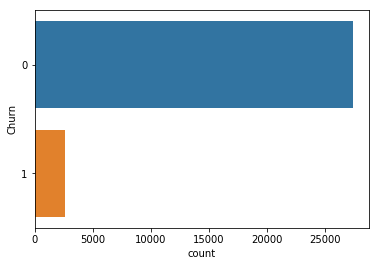

In [31]:
# number of churn and non churn in data
sns.countplot(y = 'Churn', data = tdf_cust)

# Out of the total 30,000 records, 27k customers did not churn and 2593 customers churned. 
# Churn rate is 8.64%. As we can see the data is not balanced and majority of the customers did not churn. 
# This point needs to be kept in consideration while modelling.
tdf_cust['Churn'].value_counts()

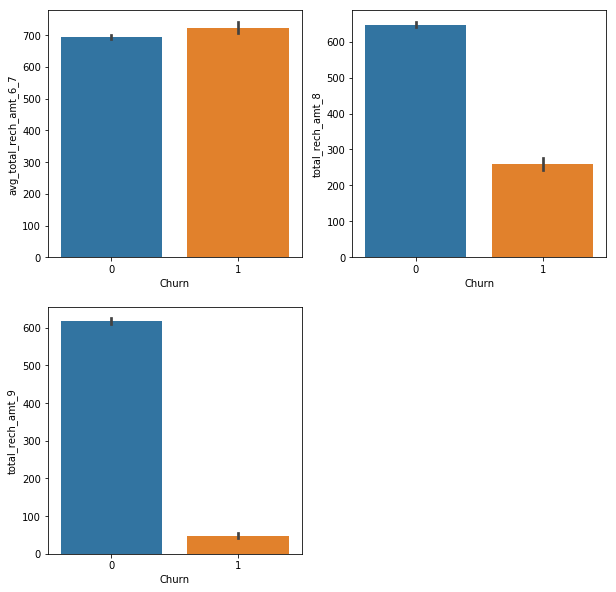

In [32]:
# number of churn and non churn in data by total recharge amount
plt.figure(figsize=(10, 10))
plt.figure(1)
plt.subplot(221)
sns.barplot(x = 'Churn',y='avg_total_rech_amt_6_7', data = tdf_cust)
plt.subplot(222)
sns.barplot(x = 'Churn',y='total_rech_amt_8', data = tdf_cust)
plt.subplot(223)
sns.barplot(x = 'Churn',y='total_rech_amt_9', data = tdf_cust)
plt.show()

# We can see that for customers who have churned, their recharge amount keeps decreasing as month goes by.
# For the customers who did not churn by month 9, the recharge amount is constant.

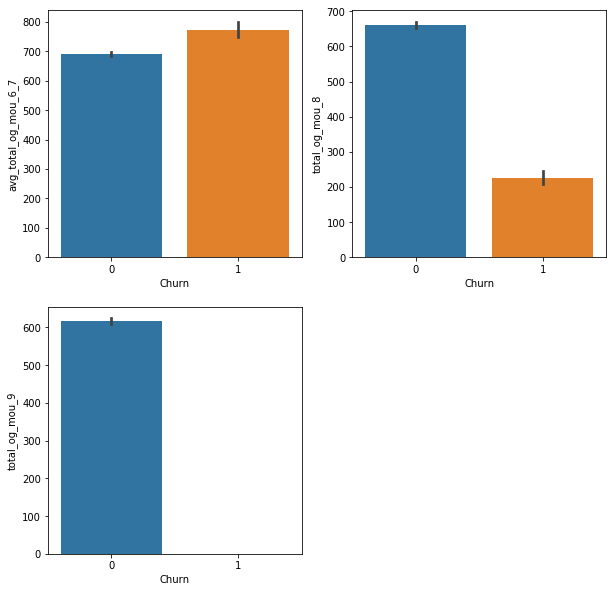

In [33]:
# number of churn and non churn in data by Total Outgoing MOU
plt.figure(figsize=(10, 10))
plt.figure(1)
plt.subplot(221)
sns.barplot(x = 'Churn',y='avg_total_og_mou_6_7', data = tdf_cust)
plt.subplot(222)
sns.barplot(x = 'Churn',y='total_og_mou_8', data = tdf_cust)
plt.subplot(223)
sns.barplot(x = 'Churn',y='total_og_mou_9', data = tdf_cust)
plt.show()

# We can see that for customers who have churned, their Total outgoing MOU reduces drastically for 8th month.
# For the customers who did not churn by month 9, the total outgoing MOU is constant.

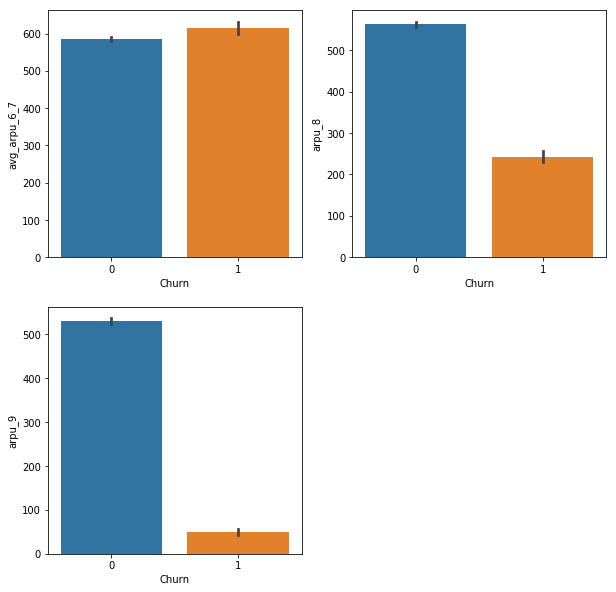

In [34]:
# number of churn and non churn in data by ARPU
plt.figure(figsize=(10, 10))
plt.figure(1)
plt.subplot(221)
sns.barplot(x = 'Churn',y='avg_arpu_6_7', data = tdf_cust)
plt.subplot(222)
sns.barplot(x = 'Churn',y='arpu_8', data = tdf_cust)
plt.subplot(223)
sns.barplot(x = 'Churn',y='arpu_9', data = tdf_cust)
plt.show()

# ARPU was high for churn customers than non churn customers for the months 6 and 7. Then it reduced drastically in 
# month 8.

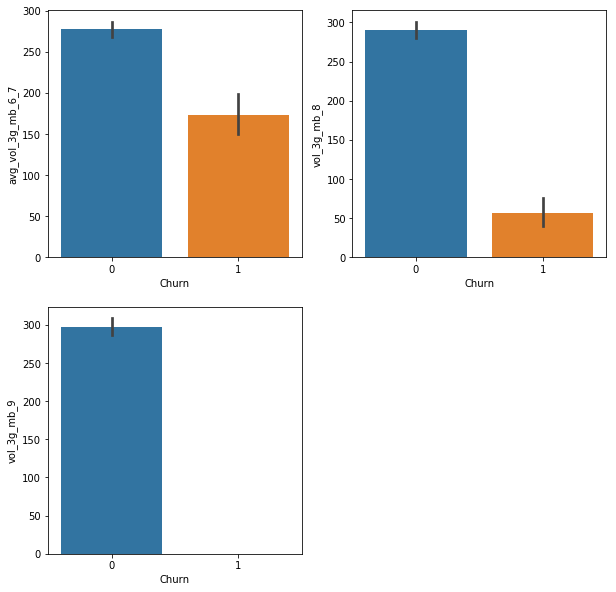

In [35]:
# number of churn and non churn in data by Mobile 3G Data Usage Volume
plt.figure(figsize=(10, 10))
plt.figure(1)
plt.subplot(221)
sns.barplot(x = 'Churn',y='avg_vol_3g_mb_6_7', data = tdf_cust)
plt.subplot(222)
sns.barplot(x = 'Churn',y='vol_3g_mb_8', data = tdf_cust)
plt.subplot(223)
sns.barplot(x = 'Churn',y='vol_3g_mb_9', data = tdf_cust)
plt.show()

# Mobile Net Usage was high for the months 6 and 7. Then it reduced drastically in month 8.

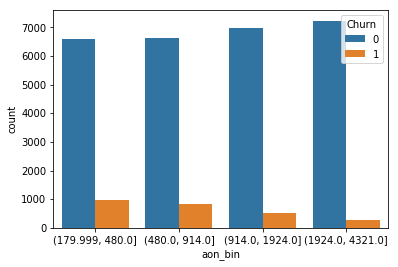

In [36]:
# Plot AON (Age On Network) and Churn to see the age of customers who got churned.

# Looks like the AON is in number of days. 
# Binning the AON data into 4 bins and plotting them against Churn variable
tdf_cust['aon_bin'] = pd.qcut(tdf_cust['aon'], q=4)
sns.countplot(tdf_cust['aon_bin'],hue=tdf_cust['Churn'])

#Drop the variable AON_BIN.
tdf_cust.drop('aon_bin',axis=1,inplace=True)

# We can see from the below graph that the number of churn customers reduces with increase in AON numbers. This means
# customers who have been for longer period with the business have less probability to churn.

### OUTLIER & CORRELATION ANALYSIS AND FURTHER CLEANING OF DATA, FINAL DATAFRAME FOR MODELLING

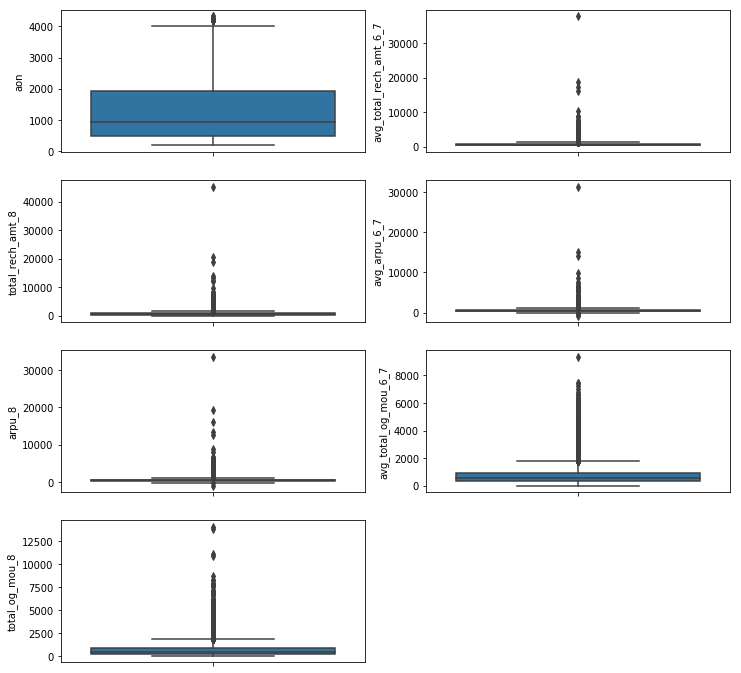

In [37]:
# Boxplot to view the outliers visually
# in variables - Total Recharge Amount, Max Recharge Amount, ARPU, AON, VBC, Total Incoming MOU, Total Outgoing MOU
plt.figure(figsize=(12, 12))
plt.figure(1)
plt.subplot(421)
sns.boxplot(data=tdf_cust,y='aon')
plt.subplot(422)
sns.boxplot(data=tdf_cust,y='avg_total_rech_amt_6_7')
plt.subplot(423)
sns.boxplot(data=tdf_cust,y='total_rech_amt_8')
plt.subplot(424)
sns.boxplot(data=tdf_cust,y='avg_arpu_6_7')
plt.subplot(425)
sns.boxplot(data=tdf_cust,y='arpu_8')
plt.subplot(426)
sns.boxplot(data=tdf_cust,y='avg_total_og_mou_6_7')
plt.subplot(427)
sns.boxplot(data=tdf_cust,y='total_og_mou_8')

plt.show()

In [38]:
# Drop mobile number as it doesn't contribute to our data analysis
# Copy to another final data frame from where we will remove mobile number and all 9th month related data

tdf_final = tdf_cust.copy()
tdf_final.drop('mobile_number',axis=1,inplace=True)
tdf_final.drop(tdf_final.columns[tdf_final.columns.str.contains("_9")],axis=1,inplace=True)

In [39]:
# Shape of final dataframe
tdf_final.shape

(30011, 104)

In [40]:
# Check for highly correlated columns
cor=tdf_final.corr()
cor

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_arpu_6_7,avg_onnet_mou_6_7,avg_offnet_mou_6_7,avg_roam_ic_mou_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2t_mou_6_7,avg_loc_og_t2m_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_loc_og_t2c_mou_6_7,avg_loc_og_mou_6_7,avg_std_og_t2t_mou_6_7,avg_std_og_t2m_mou_6_7,avg_std_og_t2f_mou_6_7,avg_std_og_mou_6_7,avg_isd_og_mou_6_7,avg_spl_og_mou_6_7,avg_og_others_6_7,avg_total_og_mou_6_7,avg_loc_ic_t2t_mou_6_7,avg_loc_ic_t2m_mou_6_7,avg_loc_ic_t2f_mou_6_7,avg_loc_ic_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_std_ic_t2m_mou_6_7,avg_std_ic_t2f_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_isd_ic_mou_6_7,avg_ic_others_6_7,avg_total_rech_num_6_7,avg_total_rech_amt_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_total_rech_data_6_7,avg_max_rech_data_6_7,avg_count_rech_2g_6_7,avg_count_rech_3g_6_7,avg_av_rech_amt_data_6_7,avg_vol_2g_mb_6_7,avg_vol_3g_mb_6_7,avg_arpu_3g_6_7,avg_arpu_2g_6_7,avg_night_pck_user_6_7,avg_monthly_2g_6_7,avg_sachet_2g_6_7,avg_monthly_3g_6_7,avg_sachet_3g_6_7,avg_fb_user_6_7,Churn
arpu_8,1.000000,0.315016,0.493213,0.101214,0.186779,0.151861,0.311892,0.135820,0.055861,0.304590,0.254114,0.300707,0.058497,0.373570,0.463244,0.089719,0.011676,0.531632,0.093820,0.179988,0.068921,0.184611,0.085049,0.101542,0.032665,0.124261,0.226584,0.020929,0.094712,0.026970,0.349814,0.953725,0.430178,0.301753,0.119752,0.221153,0.034999,0.191592,0.272868,0.059272,0.234077,0.307642,0.286205,0.041695,0.054599,0.024926,0.253421,0.076759,0.162860,0.032472,0.194868,0.137574,0.119829,0.124008,0.728212,0.148988,0.290757,0.078341,0.131416,0.088571,0.196072,0.109052,0.013781,0.189734,0.104638,0.131073,0.053742,0.161758,0.429815,0.111975,0.017333,0.297873,0.044812,0.111292,0.046152,0.107713,0.047839,0.052626,0.034106,0.068873,0.134957,-0.009140,0.080718,0.022520,0.138400,0.737228,0.319784,0.289426,0.041883,0.120415,-0.010235,0.104388,0.143174,0.013688,0.151509,0.179350,0.166108,0.011718,0.006722,-0.013836,0.157245,0.030521,0.072055,-0.182294
onnet_mou_8,0.315016,1.000000,0.069459,0.009867,0.077407,0.457610,0.000202,-0.039375,0.069517,0.290999,0.857390,0.077885,-0.027891,0.622655,-0.014964,0.120929,-0.002710,0.717868,0.090857,-0.038517,-0.026707,0.015047,0.127228,0.009941,-0.015626,0.070559,0.036596,-0.003747,-0.018242,-0.000968,0.291654,0.305173,0.044675,0.038724,-0.029549,-0.088743,-0.012354,-0.041287,-0.075263,-0.030307,-0.056336,-0.056995,-0.055380,0.055466,-0.057193,-0.001453,-0.054600,-0.016547,-0.083963,-0.064058,-0.061256,-0.071002,-0.067962,-0.023576,0.186325,0.738940,0.000789,0.022976,0.080635,0.338964,-0.045936,-0.055435,0.038546,0.184019,0.615008,0.028519,-0.034307,0.433604,-0.016986,0.066067,0.010445,0.521797,0.047137,-0.078311,-0.041512,-0.036718,0.084788,-0.019780,-0.024259,0.030547,-0.027014,-0.001631,-0.030024,-0.009685,0.151728,0.189888,-0.032598,0.002283,-0.063068,-0.111517,-0.045693,-0.056434,-0.101774,-0.058647,-0.073897,-0.073644,-0.075945,0.006380,-0.081613,-0.027725,-0.075384,-0.023416,-0.121513,-0.097004
offnet_mou_8,0.493213,0.069459,1.000000,0.032520,0.110903,0.061973,0.449096,0.087942,0.065244,0.332300,0.040804,0.848670,0.047928,0.602023,0.077810,0.105797,0.009614,0.727015,0.031991,0.182755,0.037092,0.150682,0.020245,0.149928,0.010674,0.123947,0.180570,0.080619,0.01451

In [41]:
# Correlation Matrix
cor['Churn'][:].sort_values(ascending=False)

# As it can be seen that STD and Roaming Outgoing Minutes of Usage for 6th month & 7h month is most correlated variable to churn.
# Also Roaming Outgoing Minutes of Usage for 8th month is highly correlated to churn
# Total and Local Incoming Minutes of Usage, ARPU, Total Recharge amount and Total Outgoing
# Minutes of usage for 8th month are highly  negatively correlated to churn. 
# This shows any usage during 8th month will not result in customer getting churned during 9th month.

Churn                       1.000000
avg_std_og_mou_6_7          0.093635
avg_roam_og_mou_6_7         0.083308
roam_og_mou_8               0.072375
avg_std_og_t2m_mou_6_7      0.072121
avg_std_og_t2t_mou_6_7      0.066095
avg_roam_ic_mou_6_7         0.063653
roam_ic_mou_8               0.061075
avg_total_og_mou_6_7        0.037790
avg_onnet_mou_6_7           0.037363
avg_total_rech_num_6_7      0.034195
avg_og_others_6_7           0.020316
avg_arpu_6_7                0.019854
avg_total_rech_amt_6_7      0.016692
avg_offnet_mou_6_7          0.016670
avg_std_ic_t2t_mou_6_7      0.008606
avg_spl_og_mou_6_7          0.007307
og_others_8                 0.007093
avg_loc_og_t2c_mou_6_7      0.005840
avg_isd_og_mou_6_7          0.005377
avg_sachet_3g_6_7          -0.001887
avg_std_ic_mou_6_7         -0.003725
avg_isd_ic_mou_6_7         -0.004978
isd_og_mou_8               -0.005752
avg_std_ic_t2m_mou_6_7     -0.007890
avg_night_pck_user_6_7     -0.008015
avg_spl_ic_mou_6_7         -0.008573
a

In [42]:
# Now lets view the highly intercorrelated variables 
# Replace the diagonal value of 1 to 0.
np.fill_diagonal(cor.values,0)

# Now find variables which are highly correlated
cor.unstack().sort_values(ascending=False).head(10)

# Not dropping any variables as of now. Just reviewing the highly correlated variables.
# We will be doing PCA (Principal Component analysis) which will handle the correlated variables by converting them
# into a set of uncorrelated components. 

sachet_2g_8             count_rech_2g_8           0.981607
count_rech_2g_8         sachet_2g_8               0.981607
avg_total_rech_amt_6_7  avg_arpu_6_7              0.974452
avg_arpu_6_7            avg_total_rech_amt_6_7    0.974452
avg_arpu_3g_6_7         avg_arpu_2g_6_7           0.962620
avg_arpu_2g_6_7         avg_arpu_3g_6_7           0.962620
avg_count_rech_2g_6_7   avg_sachet_2g_6_7         0.957332
avg_sachet_2g_6_7       avg_count_rech_2g_6_7     0.957332
total_rech_amt_8        arpu_8                    0.953725
arpu_8                  total_rech_amt_8          0.953725
dtype: float64

In [43]:
# Drop the below highly correlated variables with around 90% correlation
#tdf_final.drop(['count_rech_2g_8','avg_count_rech_2g_6_7','avg_arpu_6_7','arpu_8',
#                'avg_arpu_2g_6_7','arpu_2g_8','avg_arpu_3g_6_7','arpu_3g_8',
#                'avg_total_rech_data_6_7','total_rech_data_8',
#                'avg_isd_og_mou_6_7',
#               'avg_count_rech_3g_6_7','count_rech_3g_8','avg_max_rech_data_6_7',
#                'std_og_t2t_mou_8','avg_std_og_t2t_mou_6_7','std_og_mou_8',
#                'std_og_t2m_mou_8','avg_std_og_t2m_mou_6_7',
#               'avg_std_ic_t2m_mou_6_7','std_ic_t2m_mou_8','avg_loc_ic_t2m_mou_6_7','loc_ic_t2m_mou_8',
#                'avg_total_ic_mou_6_7',
#                'avg_loc_ic_t2t_mou_6_7','avg_loc_ic_t2f_mou_6_7']
#               ,axis=1,inplace=True)

In [44]:
tdf_final.shape

(30011, 104)

## MODEL BUILDING

In [45]:
# Copy the dataframe into a new dataframe for Logistic REgression model
tdf_lr=tdf_final.copy()

In [46]:
# Split the data into X and y
y = tdf_lr['Churn']
X = tdf_lr.drop('Churn',axis=1)

In [47]:
# Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=100)

In [48]:
# Scale the Train data
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [49]:
X_train_scaled

array([[-0.31896863,  0.32011514, -0.5944058 , ..., -0.33528535,
        -0.16473418, -0.63010906],
       [-0.12015727, -0.28988925, -0.42711756, ..., -0.33528535,
        -0.16473418, -0.63010906],
       [ 0.05430301, -0.38625612,  0.07451954, ..., -0.33528535,
        -0.16473418, -0.63010906],
       ...,
       [-0.02715859, -0.4858491 ,  0.55937609, ..., -0.33528535,
        -0.16473418, -0.63010906],
       [ 0.01156133,  0.72851919, -0.72275322, ..., -0.33528535,
        -0.16473418, -0.63010906],
       [-0.11636673, -0.12117437, -0.08583715, ..., -0.33528535,
        -0.16473418, -0.63010906]])

### PCA ANALYSIS - REDUCING THE DIMENSIONALITY

In [50]:
# PCA - Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
#Performing the PCA
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [51]:
# List PCA components
pca.components_

array([[ 8.44997385e-02, -3.75280397e-02, -1.50751180e-02, ...,
         1.96361028e-01,  9.28769776e-02,  1.87493559e-01],
       [ 2.11835896e-01,  1.46236232e-01,  2.02506305e-01, ...,
        -2.23357294e-02, -3.80747694e-02, -4.70701674e-02],
       [ 1.21616249e-01,  1.62214170e-01,  1.07267984e-01, ...,
         3.35107049e-02,  7.31165028e-02, -2.43060023e-03],
       ...,
       [-0.00000000e+00, -8.03376875e-16, -3.84841244e-16, ...,
         1.51071129e-16,  4.11505965e-16,  2.87879866e-16],
       [-0.00000000e+00, -3.74153034e-15, -3.23222767e-15, ...,
         1.76912877e-16, -3.83209824e-17,  3.05722329e-17],
       [-0.00000000e+00, -2.50919496e-15, -2.39948173e-15, ...,
        -1.64905631e-16, -2.10777276e-16,  9.51646238e-17]])

In [52]:
# Total number of components
pca.n_components_

103

In [53]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([1.30071231e-01, 8.73867030e-02, 7.36817910e-02, 5.67169374e-02,
       4.10431998e-02, 3.48065632e-02, 3.07734819e-02, 2.87022144e-02,
       2.48695439e-02, 2.46225896e-02, 2.22595798e-02, 2.13595448e-02,
       2.04272997e-02, 1.91246351e-02, 1.87804278e-02, 1.80025758e-02,
       1.69273354e-02, 1.65442332e-02, 1.53578068e-02, 1.48811330e-02,
       1.45968207e-02, 1.28713830e-02, 1.24538747e-02, 1.19350104e-02,
       1.14220419e-02, 1.07963864e-02, 1.04735996e-02, 1.00100791e-02,
       9.14738695e-03, 8.86625184e-03, 8.58486131e-03, 8.25889385e-03,
       8.15515831e-03, 7.81219570e-03, 7.60579271e-03, 7.43299025e-03,
       6.75631497e-03, 6.44748584e-03, 6.16084251e-03, 5.89912506e-03,
       5.85240960e-03, 5.26121521e-03, 5.15653865e-03, 4.85009153e-03,
       4.75486439e-03, 4.51891372e-03, 4.37064175e-03, 3.88559135e-03,
       3.83800688e-03, 3.60526525e-03, 3.19795323e-03, 3.11279302e-03,
       2.98738104e-03, 2.82084456e-03, 2.78664288e-03, 2.76478336e-03,
      

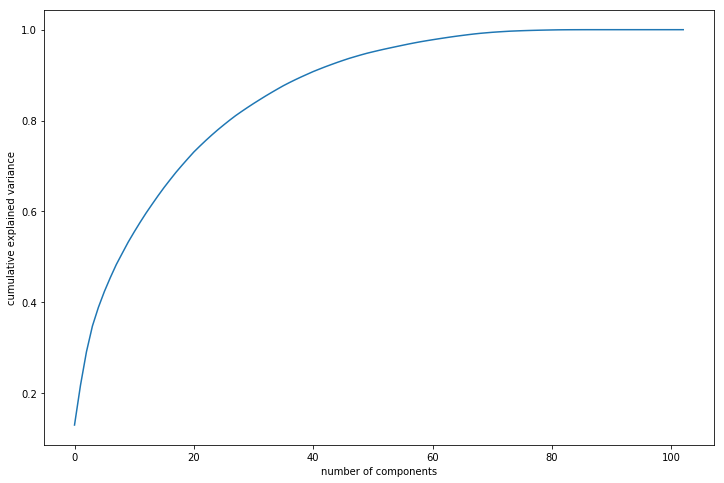

In [54]:
#Plotting the scree plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# As the below scree plot shows, around 90% of the variance in data is explained by 40 components
# hence choosing 40 components for our model

In [55]:
# More than 90% of the variance in data is explained by 40 components as shown below
np.cumsum(pca.explained_variance_ratio_)[40]

0.907877730941407

In [56]:
#Let's try and check the first three components now
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

# Looks like the most important variables are ARPU of 8th month, onnet_mou of 8th month, offnet_mou of 8th month,
# roaming incoming, outgoing MOU for 8th month, local outgoing MOU for 8th month.

,Feature,PC1,PC2,PC3
0,arpu_8,0.084500,0.211836,0.121616
1,onnet_mou_8,-0.037528,0.146236,0.162214
2,offnet_mou_8,-0.015075,0.202506,0.107268
3,roam_ic_mou_8,0.011875,0.015297,0.017897
4,roam_og_mou_8,0.002054,0.024904,0.046251
5,loc_og_t2t_mou_8,0.017813,0.138211,-0.044169
6,loc_og_t2m_mou_8,0.037759,0.186792,-0.115787
7,loc_og_t2f_mou_8,0.030593,0.075268,-0.088833
8,loc_og_t2c_mou_8,0.003521,0.021975,0.042466
9,loc_og_mou_8,0.037144,0.212161,-0.106821


In [57]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [58]:
df_train_pca = pca_final.fit_transform(X_train_scaled)
df_train_pca.shape

(21007, 40)

In [59]:
#creating correlation matrix for the principal components, we expect little or no correlation among the components
corrmat = np.corrcoef(df_train_pca.transpose())

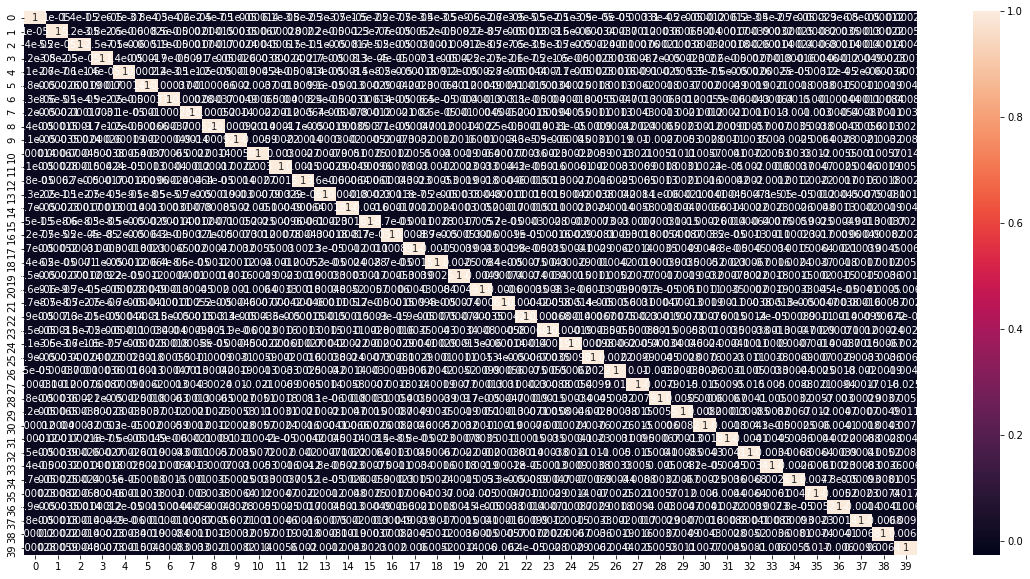

In [60]:
#plotting the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

# we see that correlations are indeed very close to 0 as the entire heatmap is black indicating values closer to zero
# Hence we have removed the multicollinearity from the data, and hence our models can be much more stable

In [61]:
# replace 1s with 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
# Now print the lower and highest correlation value from the matrix
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

# As we can see the values are much closer to zero hence no correlation between components as expected.

max corr: 0.01650564391475777 , min corr:  -0.025213757269608252


In [62]:
#Applying selected components to the test data - 40 components
df_test_pca = pca_final.transform(X_test_scaled)
df_test_pca.shape

(9004, 40)

## (1) LOGISTIC REGRESSION MODEL - FOR PREDICTING CHURN AMONG HIGH VALUE CUSTOMERS

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [64]:
# 1.  Make predictions on train data
pred_train = model_pca.predict(df_train_pca)
#convert predicted values from array to dataframe
pred_train_df = pd.DataFrame(pred_train)

#2.  Make predictions on the test data
pred_test = model_pca.predict(df_test_pca)
#convert predicted values from array to dataframe
pred_test_df = pd.DataFrame(pred_test)

# 3. accuracy score on train data
print(metrics.accuracy_score(y_train, pred_train_df)) 
# accuracy score on test data
print(metrics.accuracy_score(y_test, pred_test_df)) 

# Looks like the accuracy score on train data is 92% and on test data is 92% as well.

0.9209311181986957
0.9248111950244335


In [65]:
# Precision is the ratio of true positives/(true positives+false positives). Recall is the ratio of
# True Positives/(True Positives + False Negatives). Hence recall is the ability to find all positive samples i.e
# find all churn customers. Therefore in our case recall is more important metric.

#Confusion Matrix on test data
print(metrics.confusion_matrix(y_test,pred_test_df))
cm=metrics.confusion_matrix(y_test,pred_test_df)
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

#Precision is 
print(cm[1,1]/(cm[1,1]+cm[0,1]))
#Recall is
print(cm[1,1]/(cm[1,1]+cm[1,0]))

# The Recall value is only 21% which is not a very good number. Hence this model is predicting more churn customers
# as non churn which can be an issue for the business as we will miss the opprtunity to win back the customers.
# This low Recall rate might be because of the imbalance in data. 

# lets try different logistic model with balancaed data
# Also next we will try creating Random Forest Model as well since they are known to perform well on imbalanced data.

[[8158   76]
 [ 601  169]]
0.689795918367347
0.21948051948051947


### BALANCING THE DATA

#### Run pip install imblearn in anaconda prompt to get the library installed for SMOTE.

In [66]:
# Balance the data using SMOTE
from imblearn.over_sampling import SMOTE

SM = SMOTE(kind = "regular")
X_train_n,y_train_n = SM.fit_sample(X_train_scaled,y_train)
print(X_train_n.shape)
print(y_train_n.shape)


(38368, 103)
(38368,)


In [67]:
# The amount of records now in each category is same
# The majority class of Non Churn is equal to the total number of minority class i.e Churn.
np.bincount(y_train_n)

array([19184, 19184], dtype=int64)

### PCA ON BALANCED DATA

In [68]:
# PCA - Principal Component Analysis Again
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
#Performing the PCA
pca.fit(X_train_n)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [69]:
# More than 90% of the variance in data is explained by 40 components as shown below
np.cumsum(pca.explained_variance_ratio_)[40]

0.9092460563353407

In [90]:
#Let's try and check the first three components now
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

# Looks like the most important variables are ARPU of 8th month, onnet_mou of 8th month, offnet_mou of 8th month,
# roaming incoming, outgoing MOU for 8th month, local outgoing MOU for 8th month.

,Feature,PC1,PC2,PC3
0,arpu_8,0.137267,0.216256,0.021874
1,onnet_mou_8,0.005480,0.187155,0.086930
2,offnet_mou_8,0.039016,0.203721,-0.001500
3,roam_ic_mou_8,0.010214,0.025413,0.032800
4,roam_og_mou_8,0.000122,0.046392,0.056751
5,loc_og_t2t_mou_8,0.042866,0.090235,-0.082185
6,loc_og_t2m_mou_8,0.083219,0.124036,-0.166832
7,loc_og_t2f_mou_8,0.046774,0.041230,-0.091614
8,loc_og_t2c_mou_8,0.013796,0.042105,0.020972
9,loc_og_mou_8,0.083073,0.139397,-0.163980


In [70]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [71]:
# Fit on train data
df_train_pca = pca_final.fit_transform(X_train_n)
df_train_pca.shape

(38368, 40)

In [72]:
#Applying selected components to the test data - 40 components
df_test_pca = pca_final.transform(X_test_scaled)
df_test_pca.shape

(9004, 40)

In [73]:
y_train_n.shape

(38368,)

## (2) LOGISTIC REGRESSION MODEL WITH BALANCED DATA

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train_n)

# 1.  Make predictions on train data
pred_train = model_pca.predict(df_train_pca)
#convert predicted values from array to dataframe
pred_train_df = pd.DataFrame(pred_train)

#2.  Make predictions on the test data
pred_test = model_pca.predict(df_test_pca)
#convert predicted values from array to dataframe
pred_test_df = pd.DataFrame(pred_test)

# 3. accuracy score on train data
print(metrics.accuracy_score(y_train_n, pred_train_df)) 
# accuracy score on test data
print(metrics.accuracy_score(y_test, pred_test_df)) 

# Looks like the accuracy score has reduced from our previous model value of 92%.
# We got around 83% on train and 81% on test.

0.8319693494578816
0.8114171479342515


In [75]:
#Confusion Matrix on test data
print(metrics.confusion_matrix(y_test,pred_test_df))
cm=metrics.confusion_matrix(y_test,pred_test_df)

[[6663 1571]
 [ 127  643]]


In [76]:
print(metrics.recall_score(y_test,pred_test_df))
print(metrics.precision_score(y_test,pred_test_df))

# The recall score is still low which is 29%. But its better than previous model with 21% recall score.

0.8350649350649351
0.2904245709123758


## (3) RANDOM FOREST MODEL WITH DEFAULT PARAMETERS

In [77]:
# Now lets try to create Random Forest model as they work well with imbalanced data.
# Random Forest Model

In [78]:
# Let's first fit a random forest model with default hyperparameters
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [79]:
# fit with original non scaled X_train and y_train. Random forest doesnt need data to be scaled.
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
# predict
predictions = rfc.predict(X_test)

In [81]:
# Let's check the report of our default model
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8234
           1       0.75      0.44      0.55       770

    accuracy                           0.94      9004
   macro avg       0.85      0.71      0.76      9004
weighted avg       0.93      0.94      0.93      9004



In [82]:
# Printing confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[8121  113]
 [ 431  339]]


In [83]:
# Accuracy Score
print(metrics.accuracy_score(y_test,predictions))

# Accuracy is 93% and recall value for churn is 44%.

0.9395824078187472


## (4)RANDOM FOREST MODEL WITH TUNED PARAMETERS

In [84]:
# Now build Random Forest with hyperparameters tuned

# 1. Find optimum value for max-depth

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 2)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, return_train_score=True, scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [85]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.166955,0.005484,0.008178,0.000399,2,{'max_depth': 2},0.937173,0.934793,0.935983,0.940728,0.935476,0.936831,0.002098,8,0.937697,0.939899,0.938054,0.937106,0.937467,0.938044,0.000977
1,0.279058,0.008908,0.009176,0.000399,4,{'max_depth': 4},0.940267,0.934793,0.939791,0.941681,0.937143,0.938735,0.002458,1,0.939958,0.941506,0.939780,0.939664,0.940144,0.940210,0.000668
2,0.387974,0.008101,0.009577,0.001196,6,{'max_depth': 6},0.936459,0.933841,0.937887,0.941204,0.939762,0.937830,0.002566,3,0.942517,0.942934,0.943231,0.941568,0.942821,0.942614,0.000571
3,0.497277,0.008310,0.009775,0.000399,8,{'max_depth': 8},0.937411,0.935507,0.939791,0.939538,0.938333,0.938116,0.001561,2,0.949598,0.949777,0.947754,0.948887,0.949783,0.949160,0.000776
4,0.594818,0.004574,0.010771,0.000398,10,{'max_depth': 10},0.936221,0.934079,0.938839,0.939538,0.939048,0.937545,0.002082,5,0.958822,0.959952,0.959417,0.959776,0.961445,0.959882,0.000872


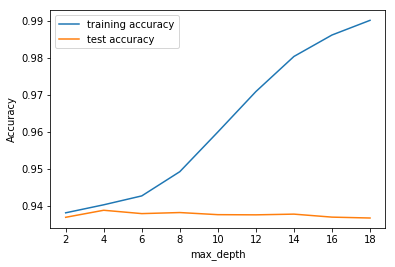

In [86]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# We can see that as the value of max_depth increases, both train and test scores increase till a point,
# but after that test score starts to decrease. The model tries to overfit as we increase the max_depth.

In [87]:
# 2. Find optimum value for n_estimators
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a low value for max_depth so that model doesnt overfit)
rf = RandomForestClassifier(max_depth=2)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [88]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.386912,0.026588,0.032315,0.001849,100,{'n_estimators': 100},0.937411,0.935983,0.936221,0.941204,0.937381,0.937640,0.001875,1,0.939542,0.940375,0.937757,0.936808,0.938835,0.938663,0.001264
1,6.649522,0.028000,0.133644,0.001093,500,{'n_estimators': 500},0.936935,0.935269,0.935745,0.941919,0.935952,0.937164,0.002438,4,0.937935,0.941029,0.937816,0.938296,0.937467,0.938509,0.001288
2,11.886798,0.043466,0.249344,0.022583,900,{'n_estimators': 900},0.936697,0.935269,0.935983,0.941681,0.936667,0.937259,0.002272,2,0.937459,0.940077,0.937995,0.936868,0.937764,0.938033,0.001090
3,17.845353,0.559941,0.341093,0.002445,1300,{'n_estimators': 1300},0.936697,0.935745,0.935745,0.941204,0.936667,0.937211,0.002040,3,0.937757,0.940196,0.937876,0.936868,0.937824,0.938104,0.001110


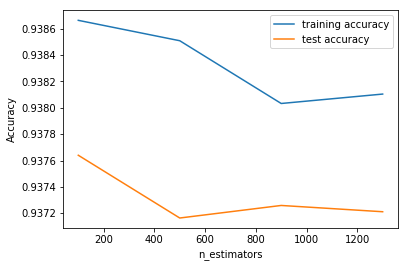

In [89]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [91]:
# 3. Find optimum value for max_features [max no. of features considered for splitting a node]
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model (note we are specifying a low value for max_depth so that model doesnt overfit)
rf = RandomForestClassifier(max_depth=2)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [92]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.093545,0.003241,0.007978,0.000631,4,{'max_features': 4},0.937649,0.935507,0.913137,0.935254,0.933333,0.930975,0.009024,5,0.938233,0.933294,0.913240,0.931691,0.931755,0.929642,0.008542
1,0.134233,0.005224,0.008178,0.000399,8,{'max_features': 8},0.934793,0.934793,0.932651,0.940014,0.936905,0.935831,0.002487,4,0.936983,0.937876,0.936209,0.936094,0.937467,0.936926,0.000693
2,0.205239,0.001595,0.008377,0.000489,14,{'max_features': 14},0.936935,0.933365,0.938839,0.940490,0.935952,0.937116,0.002442,3,0.938114,0.941089,0.938352,0.939129,0.937705,0.938878,0.001199
3,0.292600,0.027969,0.009175,0.001934,20,{'max_features': 20},0.939553,0.933603,0.942408,0.940966,0.938810,0.939068,0.002998,1,0.939542,0.940553,0.938709,0.938772,0.939430,0.939401,0.000667
4,0.328105,0.010979,0.008378,0.000799,24,{'max_features': 24},0.939553,0.934317,0.942170,0.939538,0.935000,0.938116,0.002989,2,0.939363,0.940791,0.938114,0.937760,0.938121,0.938830,0.001122


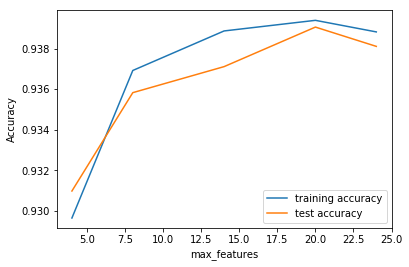

In [93]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [94]:
# 3. Find optimum value for min samples leaf [min no. of samples required to be at a leaf node]
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model (note we are specifying a low value for max_depth so that model doesnt overfit)
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [95]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.609143,0.041561,0.012766,0.002632,100,{'min_samples_leaf': 100},0.937411,0.932413,0.936221,0.940490,0.938571,0.937021,0.002701,2,0.938352,0.939244,0.938173,0.939724,0.939727,0.939044,0.000664
1,0.490251,0.017643,0.009781,0.000403,150,{'min_samples_leaf': 150},0.937649,0.935031,0.936935,0.940966,0.939286,0.937973,0.002026,1,0.937578,0.941506,0.937340,0.936927,0.938657,0.938401,0.001654
2,0.463736,0.016363,0.010569,0.001739,200,{'min_samples_leaf': 200},0.937411,0.934317,0.934317,0.940728,0.934286,0.936212,0.002558,3,0.938233,0.936983,0.936566,0.936094,0.937586,0.937092,0.000752
3,0.456155,0.023488,0.010977,0.001257,250,{'min_samples_leaf': 250},0.934793,0.931937,0.937411,0.938824,0.935476,0.935688,0.002355,6,0.936031,0.938947,0.936864,0.935559,0.936872,0.936854,0.001161
4,0.425836,0.031834,0.009773,0.000399,300,{'min_samples_leaf': 300},0.937173,0.931223,0.933603,0.941919,0.936429,0.936069,0.003609,4,0.937400,0.938709,0.936269,0.937641,0.937110,0.937426,0.000791


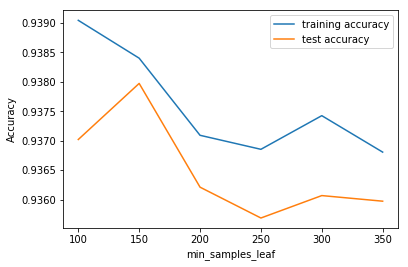

In [96]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# The model tries to overfit as we decrease the min samples leaf.

In [97]:
# 3. Find optimum value for min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model (note we are specifying a low value for max_depth so that model doesnt overfit)
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [98]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.905328,0.066200,0.013176,0.002044,200,{'min_samples_split': 200},0.938125,0.934079,0.938601,0.940490,0.938095,0.937878,0.002092,3,0.941863,0.942041,0.940434,0.940854,0.940560,0.941151,0.000671
1,0.825546,0.013854,0.011380,0.000491,250,{'min_samples_split': 250},0.939553,0.934793,0.936459,0.941204,0.936429,0.937687,0.002338,5,0.940494,0.941803,0.939304,0.940795,0.938597,0.940199,0.001130
2,0.837712,0.029449,0.012571,0.003708,300,{'min_samples_split': 300},0.939553,0.934793,0.937411,0.942157,0.936190,0.938021,0.002592,2,0.940375,0.941148,0.939066,0.938712,0.938835,0.939627,0.000965
3,0.780667,0.015063,0.011569,0.000797,350,{'min_samples_split': 350},0.937887,0.934079,0.938363,0.942157,0.936429,0.937783,0.002647,4,0.939363,0.939304,0.939661,0.938653,0.938300,0.939056,0.000501
4,0.812182,0.045930,0.011568,0.001197,400,{'min_samples_split': 400},0.936697,0.934793,0.936221,0.940728,0.939286,0.937545,0.002155,6,0.938828,0.940672,0.938590,0.939486,0.939965,0.939508,0.000758


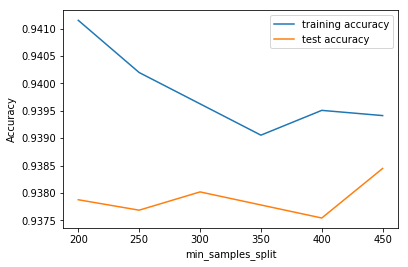

In [99]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [100]:
#Optimal hyperparameters using GridSearchCV.

In [101]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200,300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [102]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [103]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9381634693197506 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 100}


In [105]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             max_features=10,
                             n_estimators=100)

In [106]:
# fit
rfc.fit(X_train,y_train)
# predict
predictions = rfc.predict(X_test)

In [107]:
# Report on test data
print(metrics.classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8234
           1       0.79      0.46      0.58       770

    accuracy                           0.94      9004
   macro avg       0.87      0.73      0.78      9004
weighted avg       0.94      0.94      0.94      9004



In [108]:
# Confusion matrix 
print(metrics.confusion_matrix(y_test,predictions))

# Both Precision score and Recall score has improved in Random forest when compared to regression model.
# The Recall score [357/(357+413)] is at 46% which is better than the 29% of Logistic Regression model.

[[8137   97]
 [ 413  357]]


In [109]:
# Accuracy score for Random Forest Model is 94%.
print(metrics.accuracy_score(y_test,predictions))

0.9433585073300755


In [110]:
# Feature Importance
feat_imp = pd.DataFrame({'importance':rfc.feature_importances_})    
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp    

# The top important features or variables predicting a customer getting churned as per Random Forest Model are
# local incoming MOU, Total outgoing MOU, ARPU, Total Recharge Amount for 8th month.

,importance,feature
26,0.136788,total_ic_mou_8
6,0.101763,loc_og_t2m_mou_8
0,0.101099,arpu_8
21,0.099930,loc_ic_mou_8
9,0.071702,loc_og_mou_8
17,0.068711,total_og_mou_8
19,0.065439,loc_ic_t2m_mou_8
18,0.048300,loc_ic_t2t_mou_8
32,0.041578,max_rech_amt_8
31,0.029473,total_rech_amt_8


## FINDINGS 

### Random Forest Model (using Tuned Parameters) with 94% accuracy and recall value of 46% is the preferred model for Predicting High Value Customer Churn


### Further, the Random Forest Model identifies the following important features that impact churn among High Value Customers:

### Minutes of Usage - voice calls (total/local incoming, local outgoing), Average Revenue Per User, and Max & Total Recharge Amount for 8th Month (Action Phase) form the critical indicators for churn which is similar to what the logistic regression model indicates.

### Looks like customers who stay with the network for longer, tend to stay and not churn

### 8th month behaviour forms the basis of churn.


## RECOMMENDATIONS FOR BUSINESS

### Apply the Random Forest Model (Tuned Parameters) to identify High Value Customers with high probability of churn.  

### Make appropriate offers to these customers with the objective of retaining them. For e.g.:

#### Bonus recharge be given for different recharge packs - meaning higher amounts will get higher bonus or value added services free of cost. Further, such offers can be directed to individual users based on when they reach the Action Phase. 

####  Tariff for STD and ISD Outgoing can be reduced to make them competitive. 

#### Periodical follow-ups with the high value customers can be done to offer better packages that result in value add/savings for these customers and retention of their loyalty for the business. 